In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv("train.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


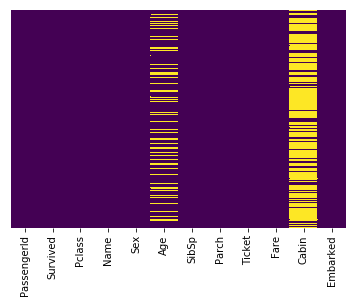

In [9]:
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

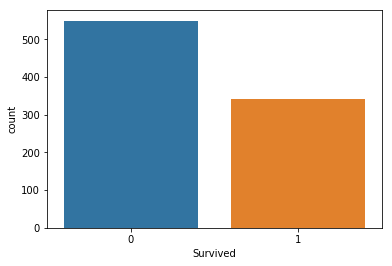

In [10]:
sns.countplot(x=df['Survived'],data=df)

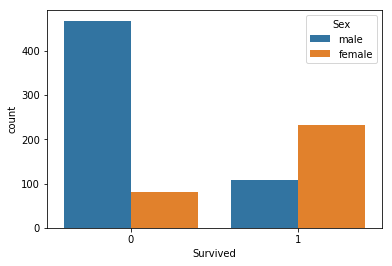

In [11]:
sns.countplot(x=df['Survived'],data=df,hue='Sex')

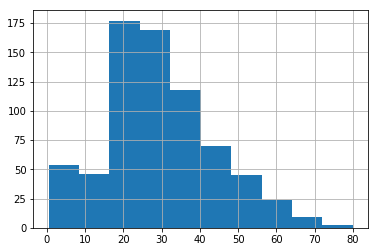

In [12]:
df['Age'].hist()

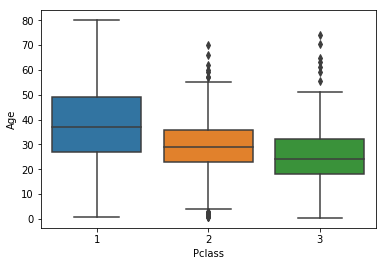

In [13]:
sns.boxplot(x=df['Pclass'],y=df['Age'],data=df)

In [14]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
            

In [15]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

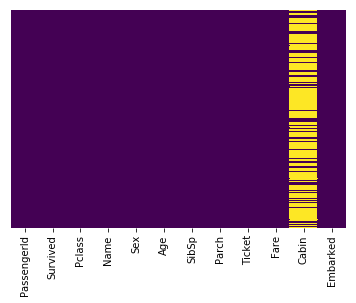

In [16]:
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [17]:
df.drop('Cabin',inplace=True,axis=1)

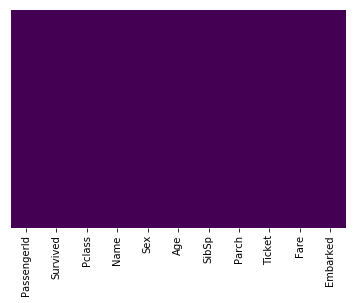

In [18]:
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
df.dropna(inplace=True)

In [21]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [22]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [23]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [25]:
df=pd.concat([df,sex,embark],axis=1)

In [26]:
df.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
male           False
Q              False
S              False
dtype: bool

In [27]:
x_new=pd.read_csv('test.csv')
x_new.drop(['Cabin'],axis=1,inplace=True)
x_new['Age']=x_new[['Age','Pclass']].apply(impute_age,axis=1)


In [28]:

sex=pd.get_dummies(x_new['Sex'],drop_first=True)
embark=pd.get_dummies(x_new['Embarked'],drop_first=True)
x_new.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
x_new=pd.concat([x_new,sex,embark],axis=1)


In [29]:
x_new.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [30]:
X_test=x_new
X_test['Fare']=X_test['Fare'].fillna(lambda x: x.median())
X_test.isnull().any()



PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
male           False
Q              False
S              False
dtype: bool

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_X = df[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare', 'Q','S']]
train_y = df['Survived']

test_X = X_test[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare', 'Q','S']]

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lg=LogisticRegression()

In [35]:
lg.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
pred=lg.predict(test_X)


In [37]:
from sklearn.metrics import classification_report,accuracy_score

In [41]:
print(lg.score(train_X,train_y))

0.802024746907


In [43]:
pd.DataFrame({'PassengerId':X_test.PassengerId,'Survived':pred}).set_index('PassengerId').to_csv('Tita5.csv')

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc=RandomForestClassifier(n_estimators=100)

In [46]:
rfc.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
rfc_pred=rfc.predict(test_X)

In [50]:
accuracy_score=round(rfc.score(train_X,train_y))

In [51]:
accuracy_score

1.0

In [52]:
pd.DataFrame({'PassengerId':X_test.PassengerId,'Survived':rfc_pred}).set_index('PassengerId').to_csv('Tita3.csv')